# **Exploratory Data Analysis**

In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'age', 'gender', 'ethnicity', 'jaundice',
           'autism', 'country_of_res', 'used_app_before', 'result', 'age_desc', 'relation', 'class']
data = pd.read_csv("input.csv") #.drop(['Unnamed: 0'],axis=1)
#data.to_csv('input.csv',index=False)
data = data[columns]

In [3]:
#Defining the number or rows and columns
print(data.shape)

(1100, 21)




> Dataset consists of 1100 rows and 21 columns.



In [4]:
#Handling null values
data = pd.read_csv("input.csv", na_values=['?'])
data.isnull().sum()

age                  6
gender               0
ethnicity          144
jaundice             0
autism               0
relation           144
country_of_res       0
used_app_before      0
age_desc             0
A1                   0
A2                   0
A3                   0
A4                   0
A5                   0
A6                   0
A7                   0
A8                   0
A9                   0
A10                  0
result               0
class                0
dtype: int64

In [5]:
#Displaying the dataset
data

,age,gender,ethnicity,jaundice,autism,relation,country_of_res,used_app_before,age_desc,A1,...,A3,A4,A5,A6,A7,A8,A9,A10,result,class
0,6.0,m,Others,no,no,Parent,Jordan,no,'4-11 years',1,...,0,0,1,1,0,1,0,0,5,NO
1,6.0,m,'Middle Eastern ',no,no,Parent,Jordan,no,'4-11 years',1,...,0,0,1,1,0,1,0,0,5,NO
2,6.0,m,NaN,no,no,NaN,Jordan,yes,'4-11 years',1,...,0,0,0,1,1,1,0,0,5,NO
3,5.0,f,NaN,yes,no,NaN,Jordan,no,'4-11 years',0,...,0,0,1,1,0,0,0,1,4,NO
4,5.0,m,Others,yes,no,Parent,'United States',no,'4-11 years',1,...,1,1,1,1,1,1,1,1,10,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,25.0,f,White-European,no,no,Self,Russia,no,'18 and more',0,...,0,1,1,0,1,1,1,1,7,YES
1096,34.0,m,Hispanic,no,no,Parent,Mexico,no,'18 and more',1,...,0,0,0,0,0,1,0,1,3,NO
1097,24.0,f,NaN,no,no,NaN,Russia,no,'18 and more',1,...,1,1,1,0,1,1,0,1,7,YES
1098,35.0,m,'South Asian',no,no,Self,Pakistan,no,'18 and more',1,...,0,1,1,0,1,0,1,1,6,NO


In [6]:
#Print out a description of the dataframe
data.describe()

,age,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,result
count,1094.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,22.073126,0.699091,0.482727,0.551818,0.530000,0.587273,0.443636,0.477273,0.605455,0.412727,0.621818,5.411818
std,16.879373,0.458862,0.499929,0.497534,0.499326,0.492548,0.497039,0.499710,0.488975,0.492548,0.485154,2.523492
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,21.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000
75%,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.250000
max,383.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [7]:
data.nunique()

age                59
gender              2
ethnicity          12
jaundice            2
autism              2
relation            6
country_of_res     89
used_app_before     2
age_desc            4
A1                  2
A2                  2
A3                  2
A4                  2
A5                  2
A6                  2
A7                  2
A8                  2
A9                  2
A10                 2
result             11
class               2
dtype: int64



> All other features except age and country_of_res have sufficiently low cardinality to one-hot encode them.



In [8]:
#Drop unwanted columns
data = data.drop(['age_desc', 'used_app_before', 'relation', 'result'], axis=1)

In [9]:
#Rename the columns
data.rename(columns = {'jundice':'jaundice', 'contry_of_res':'country_of_res'}, inplace = True)

In [10]:
#Displaying concise summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1094 non-null   float64
 1   gender          1100 non-null   object 
 2   ethnicity       956 non-null    object 
 3   jaundice        1100 non-null   object 
 4   autism          1100 non-null   object 
 5   country_of_res  1100 non-null   object 
 6   A1              1100 non-null   int64  
 7   A2              1100 non-null   int64  
 8   A3              1100 non-null   int64  
 9   A4              1100 non-null   int64  
 10  A5              1100 non-null   int64  
 11  A6              1100 non-null   int64  
 12  A7              1100 non-null   int64  
 13  A8              1100 non-null   int64  
 14  A9              1100 non-null   int64  
 15  A10             1100 non-null   int64  
 16  class           1100 non-null   object 
dtypes: float64(1), int64(10), object(

In [11]:
#Datatype Handling
data.dtypes

age               float64
gender             object
ethnicity          object
jaundice           object
autism             object
country_of_res     object
A1                  int64
A2                  int64
A3                  int64
A4                  int64
A5                  int64
A6                  int64
A7                  int64
A8                  int64
A9                  int64
A10                 int64
class              object
dtype: object

In [12]:
#Total number of records
n_records = len(data.index)

#Number of records where individual's with ASD
n_asd_yes = len(data[data['class'] == 'YES'])

#Number of records where individual's with no ASD
n_asd_no = len(data[data['class'] == 'NO'])

#Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

# Print the results
print ("Total number of records:", n_records)
print ("Individuals diagonised with ASD:", n_asd_yes)
print ("Individuals not diagonised with ASD:", n_asd_no)
print ("Percentage of individuals diagonised with ASD:", yes_percent)

Total number of records: 1100
Individuals diagonised with ASD: 393
Individuals not diagonised with ASD: 707
Percentage of individuals diagonised with ASD: 35.72727272727273


NO     707
YES    393
Name: class, dtype: int64




<AxesSubplot:xlabel='class', ylabel='count'>

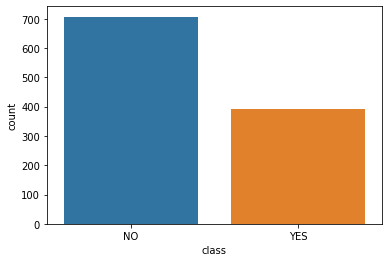

In [13]:
#Classifying countplot for person suffering from ASD 
print(data['class'].value_counts())
print("\n")
sns.countplot(data['class'])

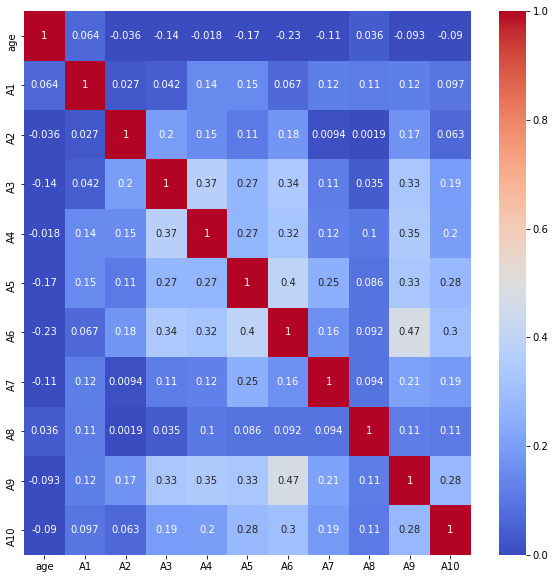

In [14]:
#Plotting Corrplot of the columns in dataset
ig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(data.corr(),annot=True,cmap='coolwarm',vmin=0, vmax=1)

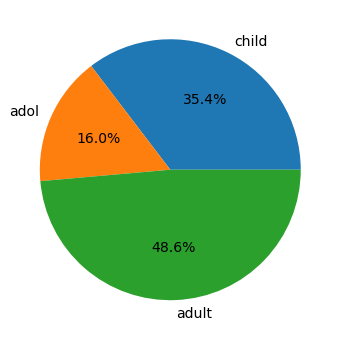

In [15]:
#Plotting pie chart of people suffering from autism spectrum of different age group
child = []
adol = []
adult = []

ages = data.iloc[:,0].tolist()
ads = data.iloc[:,-1].tolist()

for index in range(len(ages)):
    if ads[index] == 'YES':
        if ages[index] <= 11:
            child.append(ages[index])
        elif ages[index] > 11 and ages[index] <= 16:
            adol.append(ages[index])
        else:
            adult.append(ages[index])

y = np.array([len(child), len(adol), len(adult)])

fig = plt.figure(figsize=(20,6))
plt.pie(y,labels=["child", "adol", "adult"], autopct='%1.1f%%', textprops={'fontsize': 14})
plt.show()

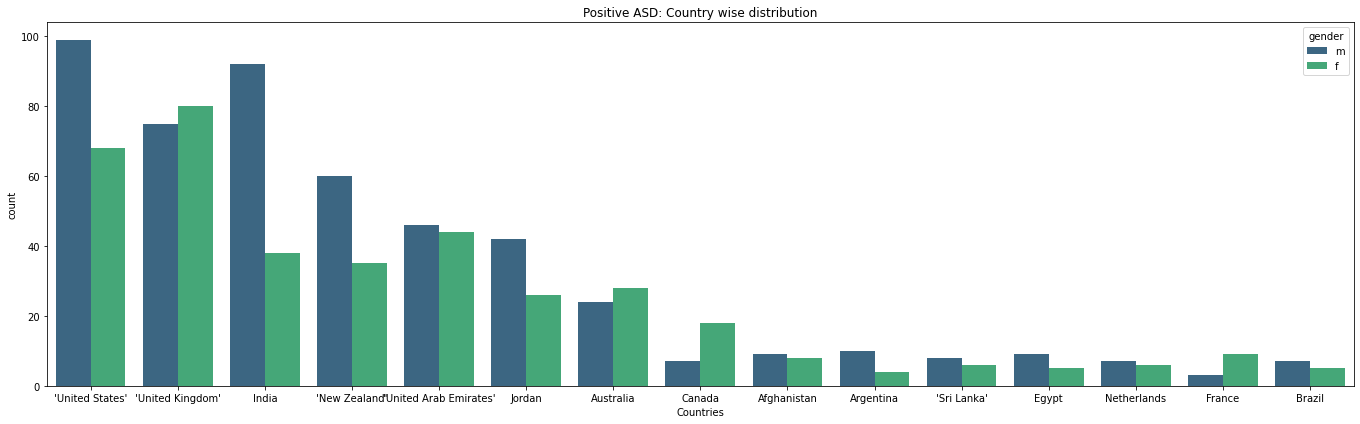

In [16]:
#Visualize positive ASD positive Adults based on top 15 countries
plt.figure(figsize=(19,6))
sns.countplot(x='country_of_res',data = data, order= data['country_of_res'].value_counts().index[:15],hue='gender',palette='viridis')
plt.title('Positive ASD: Country wise distribution')
plt.xlabel('Countries')
plt.tight_layout()

In [17]:
#Ethnicity value counts
data.ethnicity.fillna('Others',inplace=True)
data.ethnicity.replace("others",'Others',inplace=True)
data.ethnicity.replace("'Middle Eastern '",'Middle Eastern',inplace=True)
data.ethnicity.replace("Middle Eastern '",'Middle Eastern',inplace=True)
data.ethnicity.replace("'South Asian'",'South Asian',inplace=True)
data['ethnicity'].value_counts()

White-European    381
Others            201
Asian             185
Middle Eastern    128
Black              65
South Asian        60
Latino             33
Hispanic           25
Pasifika           14
Turkish             8
Name: ethnicity, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Middle Eastern'),
  Text(2, 0, 'White-European'),
  Text(3, 0, 'Black'),
  Text(4, 0, 'South Asian'),
  Text(5, 0, 'Asian'),
  Text(6, 0, 'Pasifika'),
  Text(7, 0, 'Hispanic'),
  Text(8, 0, 'Turkish'),
  Text(9, 0, 'Latino')])

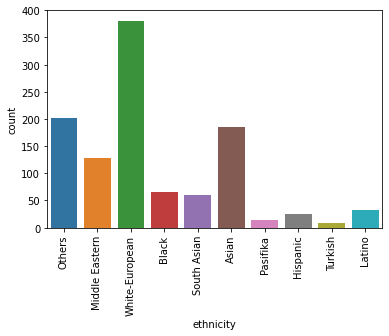

In [18]:
#Plot for the Ethnicity
sns.countplot(data['ethnicity'])
plt.xticks(rotation=90)

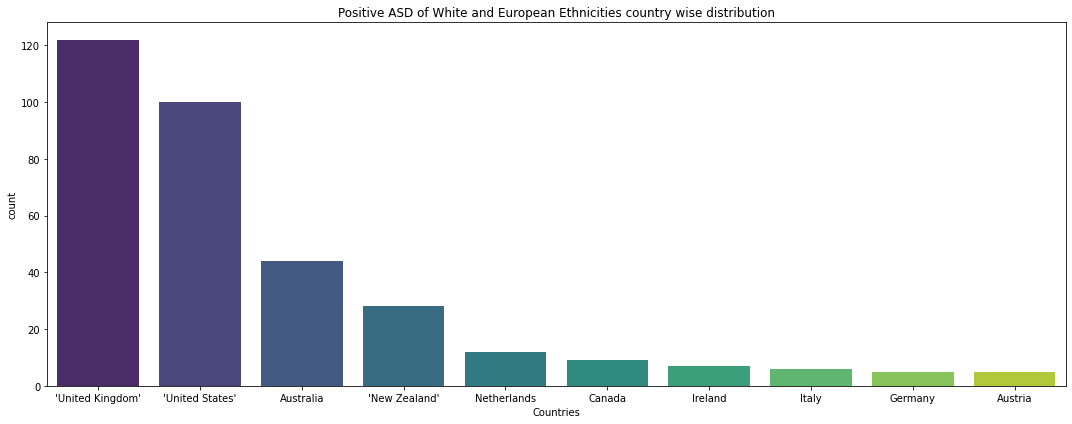

In [19]:
#Positive ASD of White and European Ethnicities country wise distribution
plt.figure(figsize=(15,6))
sns.countplot(x='country_of_res',data = data[data['ethnicity']=='White-European'], order = data[data['ethnicity']=='White-European']['country_of_res'].value_counts().index[:10],palette='viridis')
plt.title('Positive ASD of White and European Ethnicities country wise distribution')
plt.xlabel('Countries')
plt.tight_layout()



> From the above code we are considering both country and ethnicity because the reports suggests so.



<AxesSubplot:xlabel='jaundice', ylabel='count'>

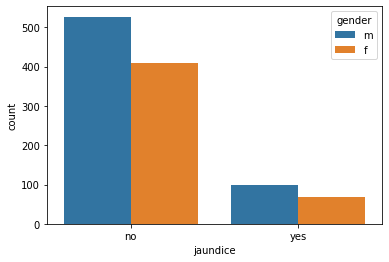

In [20]:
#Countplot of ASD positive born with Jaundice based on gender 
sns.countplot(x = 'jaundice', hue = 'gender', data = data)

Text(0.5, 0, 'Relatives with ASD')

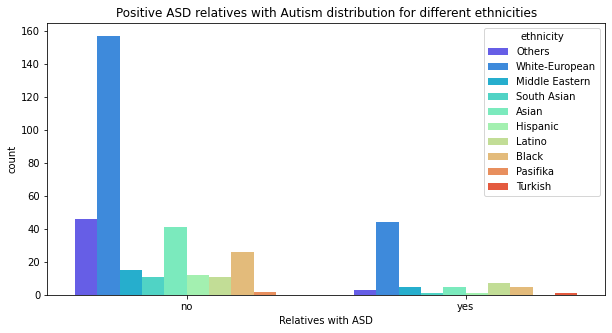

In [21]:
#Visualize the distribution of autism in family within different ethnicity
data1 = data[data['class']=='YES']
plt.figure(figsize = (10,5))
sns.countplot(x = 'autism', data = data1, hue = 'ethnicity', palette = 'rainbow')
plt.title('Positive ASD relatives with Autism distribution for different ethnicities')
plt.xlabel('Relatives with ASD')

# **Preprocessing**

In [22]:
data = pd.read_csv("input.csv")
data1 = data.replace('?', np.nan)
data1.dropna(axis=0, inplace=True)
data1.to_csv("childDataNaAge.csv", sep=",", index=False)

In [23]:
def test_process(raw_data):
    d1= raw_data.replace({'gender': 'f'}, 1).replace({'gender': 'm'}, 0). \
    replace({'jaundice': 'yes'}, 1).replace({'jaundice': 'no'}, 0). \
    replace({'autism': 'yes'}, 1).replace({'autism': 'no'}, 0)
    return d1

def train_process(raw_data):
    d1= raw_data.replace({'gender': 'f'}, 1).replace({'gender': 'm'}, 0). \
    replace({'jaundice': 'yes'}, 1).replace({'jaundice': 'no'}, 0). \
    replace({'autism': 'yes'}, 1).replace({'autism': 'no'}, 0). \
    replace({'class': 'YES'}, 1).replace({'class': 'NO'}, 0)
    
    final_data = d1.drop(['ethnicity'], 1).drop(['country_of_res'], 1).drop(['used_app_before'], 1). \
    drop(['age_desc'], 1).drop(['relation'], 1)
    
    return final_data

In [24]:
data = pd.read_csv("childDataNaAge.csv")
data2 = data.replace({'gender': 'f'}, 1).replace({'gender': 'm'}, 0). \
    replace({'jaundice': 'yes'}, 1).replace({'jaundice': 'no'}, 0). \
    replace({'autism': 'yes'}, 1).replace({'autism': 'no'}, 0). \
    replace({'class': 'YES'}, 1).replace({'class': 'NO'}, 0)

In [25]:
data3 = data2.drop(['ethnicity'], 1).drop(['country_of_res'], 1).drop(['used_app_before'], 1). \
    drop(['age_desc'], 1).drop(['relation'], 1).drop(['result'], 1).drop(['gender'], 1).drop(['jaundice'], 1).drop(
    ['autism'], 1).drop(['age'], 1)
data3.to_csv("childAllAs.csv", sep=",", index=False)

In [26]:
data4 = data2.drop(['ethnicity'], 1).drop(['country_of_res'], 1).drop(['used_app_before'], 1). \
    drop(['age_desc'], 1).drop(['relation'], 1)  # .drop(['age'], 1)#.drop(['result'], 1)
data4.to_csv("childDataNaBinaryNAgeWResult.csv", sep=",", index=False)
print(data4.columns)

Index(['age', 'gender', 'jaundice', 'autism', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'result', 'class'],
      dtype='object')


In [27]:
data5 = data4[['A5', 'A6', 'A9', 'A10', 'age', 'gender', 'jaundice', 'autism', 'class']]
# data5 = data4[['A5', 'A6', 'A9', 'A10', 'class']]
data5.to_csv("childDataNaAgeNResult.csv", sep=",", index=False)


# **Model Implementation**

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import graphviz

import time

from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix




from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [29]:
data = pd.read_csv("childDataNaBinaryNAgeWResult.csv")

dataX = data.drop(['class'], 1)
dataY = data['class']
print(dataX.values[0])
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size = 0.2, random_state = 40)


[6 0 0 0 1 1 0 0 1 1 0 1 0 0 5]


### *Decision Tree Classifier*

In [30]:
dcTree = tree.DecisionTreeClassifier(criterion='entropy')
start = time.time()
dcTree = dcTree.fit(x_train, y_train)
stop = time.time()
dcTree_time = f"{stop - start}"

dcTree_prediction = dcTree.predict(x_test)
dcTree_accuracy = dcTree.score(x_test, y_test)

print(dcTree_accuracy)
print(classification_report(y_test, dcTree_prediction))
cm_dcTree = confusion_matrix(y_test, dcTree_prediction)
print(cm_dcTree)
TN_dcTree, FP_dcTree, FN_dcTree, TP_dcTree = cm_dcTree.ravel()

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        63

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191

[[128   0]
 [  0  63]]


In [31]:
#AUC Score
auc_score_dcTree = roc_auc_score(y_test, dcTree.predict(x_test))
fpr_dcTree, tpr_dcTree, thresholds_dcTree = roc_curve(y_test, dcTree.predict_proba(x_test)[:,1])
print("AUC Score:",auc_score_dcTree)

AUC Score: 1.0


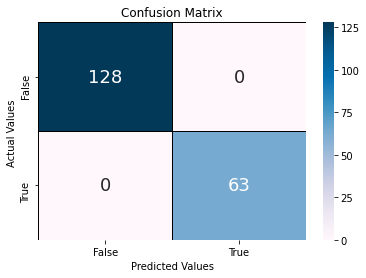

In [32]:
#Confusion Matrix
cm_dcTree = confusion_matrix(y_test, dcTree_prediction)

#Plotting the confusion matrix
ax = sns.heatmap(cm_dcTree, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=1, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [33]:
# 1.  Sensitivity
sensitivity_dcTree = TP_dcTree / float(TP_dcTree + FN_dcTree)
print("Sensitivity:",sensitivity_dcTree)

# 2.  Specificity
specificity_dcTree = TN_dcTree / float(TN_dcTree + FP_dcTree)
print("Specificity:",specificity_dcTree)

# 3.  Precision
precision_dcTree = TP_dcTree / float(TP_dcTree + FP_dcTree)
print("Precision:",precision_dcTree)

# 4.  Accuracy
accuracy_dcTree = (TP_dcTree + TN_dcTree) / float(TP_dcTree + TN_dcTree + FN_dcTree + FP_dcTree)
print("Accuracy:",accuracy_dcTree)

Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
Accuracy: 1.0



### *Multinomial Naive Bayes*

In [34]:
NB = MultinomialNB(alpha = 1, class_prior = None, fit_prior = False)
scores = cross_val_score(NB, x_train, y_train, cv = 10)
#print scores.mean(), scores.std()*2
start = time.time()
NB.fit(x_train, y_train)
stop = time.time()
NB_time = f"{stop - start}"

NB_prediction = NB.predict(x_test)
NB_accuracy = NB.score(x_test, y_test)

print(NB_accuracy)
print(classification_report(y_test, NB_prediction))
cm_NB = confusion_matrix(y_test, NB_prediction)
print(cm_NB)
TN_NB, FP_NB, FN_NB, TP_NB = cm_NB.ravel()

0.7643979057591623
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       128
           1       0.60      0.89      0.71        63

    accuracy                           0.76       191
   macro avg       0.76      0.80      0.76       191
weighted avg       0.82      0.76      0.77       191

[[90 38]
 [ 7 56]]


In [35]:
#AUC Score
auc_score_NB = roc_auc_score(y_test, NB.predict(x_test))
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, NB.predict_proba(x_test)[:,1])
print("AUC Score:",auc_score_NB)

AUC Score: 0.7960069444444444


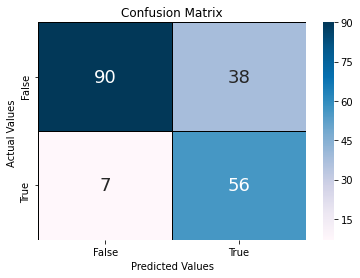

In [36]:
#Confusion Matrix
cm_NB = confusion_matrix(y_test, NB_prediction)

#Plotting the confusion matrix
ax = sns.heatmap(cm_NB, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=1, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [37]:
# 1.  Sensitivity
sensitivity_NB = TP_NB / float(TP_NB + FN_NB)
print("Sensitivity:",sensitivity_NB)

# 2.  Specificity
specificity_NB = TN_NB / float(TN_NB + FP_NB)
print("Specificity:",specificity_NB)

# 3.  Precision
precision_NB = TP_NB / float(TP_NB + FP_NB)
print("Precision:",precision_NB)

# 4.  Accuracy
accuracy_NB = (TP_NB + TN_NB) / float(TP_NB + TN_NB + FN_NB + FP_NB)
print("Accuracy:",accuracy_NB)

Sensitivity: 0.8888888888888888
Specificity: 0.703125
Precision: 0.5957446808510638
Accuracy: 0.7643979057591623


In [38]:
scaler = StandardScaler()
###compute the mean and std to be used for later scaling
scaler.fit(x_train)

###Perform standardization by centering and scaling
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### *Logistic Regression*

In [39]:
LR = LogisticRegression(penalty = 'l2')
scores = cross_val_score(LR, x_train, y_train, cv = 10)
#print scores.mean(), scores.std()*2
start = time.time()
LR.fit(x_train, y_train)
stop = time.time()
LR_time = f"{stop - start}"
LR_prediction = LR.predict(x_test)
LR_accuracy = LR.score(x_test, y_test)

print(LR_accuracy)
print(classification_report(y_test, LR_prediction))
cm_LR = confusion_matrix(y_test, LR_prediction)
print(cm_LR)
TN_LR, FP_LR, FN_LR, TP_LR = cm_LR.ravel()

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        63

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191

[[128   0]
 [  0  63]]


In [40]:
#AUC Score
auc_score_LR = roc_auc_score(y_test, LR.predict(x_test))
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, LR.predict_proba(x_test)[:,1])
print("AUC Score:",auc_score_LR)

AUC Score: 1.0


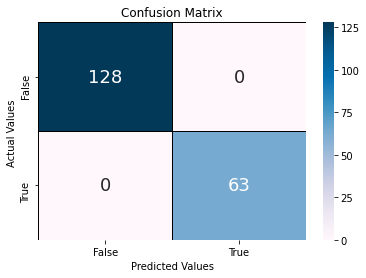

In [41]:
#Confusion Matrix
cm_LR = confusion_matrix(y_test, LR_prediction)

#Plotting the confusion matrix
ax = sns.heatmap(cm_LR, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=1, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [42]:
# 1.  Sensitivity
sensitivity_LR = TP_LR / float(TP_LR + FN_LR)
print("Sensitivity:",sensitivity_LR)

# 2.  Specificity
specificity_LR = TN_LR / float(TN_LR + FP_LR)
print("Specificity:",specificity_LR)

# 3.  Precision
precision_LR = TP_LR / float(TP_LR + FP_LR)
print("Precision:",precision_LR)

# 4.  Accuracy
accuracy_LR = (TP_LR + TN_LR) / float(TP_LR + TN_LR + FN_LR + FP_LR)
print("Accuracy:",accuracy_LR)

Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
Accuracy: 1.0


### *Support Vector Machine*

In [43]:
svm = SVC(C=1, kernel = 'linear', degree = 1, cache_size = 200, max_iter = 100000, probability=True)
svm = SVC(C=1, kernel = 'poly', degree = 3, cache_size = 200, max_iter = 100000, probability=True) ##this is for A3,A4,A7,A9,A10 only
scores = cross_val_score(svm, x_train, y_train, cv = 10)
#print scores.mean(), scores.std()*2
start = time.time()
svm.fit(x_train, y_train)
stop = time.time()
svm_time = f"{stop - start}"
svm_prediction = svm.predict(x_test)
svm_accuracy = svm.score(x_test, y_test)

print(svm_accuracy)
print(classification_report(y_test, svm_prediction))
cm_svm = confusion_matrix(y_test, svm_prediction)
print(cm_svm)
TN_svm, FP_svm, FN_svm, TP_svm = cm_svm.ravel()

0.9633507853403142
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       128
           1       0.94      0.95      0.94        63

    accuracy                           0.96       191
   macro avg       0.96      0.96      0.96       191
weighted avg       0.96      0.96      0.96       191

[[124   4]
 [  3  60]]


In [44]:
#AUC Score
auc_score_svm = roc_auc_score(y_test, svm.predict(x_test))
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.predict_proba(x_test)[:,1])
print("AUC Score:",auc_score_svm)

AUC Score: 0.9605654761904762


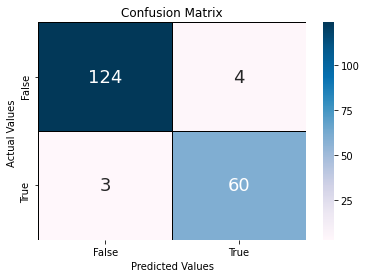

In [45]:
#Confusion Matrix
cm_svm = confusion_matrix(y_test, svm_prediction)

#Plotting the confusion matrix
ax = sns.heatmap(cm_svm, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=1, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [46]:

# 1.  Sensitivity
sensitivity_svm = TP_svm / float(TP_svm + FN_svm)
print("Sensitivity:",sensitivity_svm)

# 2.  Specificity
specificity_svm = TN_svm / float(TN_svm + FP_svm)
print("Specificity:",specificity_svm)

# 3.  Precision
precision_svm = TP_svm / float(TP_svm + FP_svm)
print("Precision:",precision_svm)

# 4.  Accuracy
accuracy_svm = (TP_svm + TN_svm) / float(TP_svm + TN_svm + FN_svm + FP_svm)
print("Accuracy:",accuracy_svm)

Sensitivity: 0.9523809523809523
Specificity: 0.96875
Precision: 0.9375
Accuracy: 0.9633507853403142


### *Multi Layer Perceptron Classifier*

In [47]:
NN = MLPClassifier(hidden_layer_sizes = (10), max_iter = 1000, learning_rate_init = 0.05, momentum = 0.1)
scores = cross_val_score(NN, x_train, y_train, cv = 10)
#print scores.mean(), scores.std()*2
start = time.time()
NN.fit(x_train, y_train)
stop = time.time()
NN_time = f"{stop - start}"
NN_prediction = NN.predict(x_test)
NN_accuracy = NN.score(x_test, y_test)

print(NN_accuracy)
print(classification_report(y_test, NN_prediction))
cm_NN = confusion_matrix(y_test, NN_prediction)
print(cm_NN)
TN_NN, FP_NN, FN_NN, TP_NN = cm_NN.ravel()

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        63

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191

[[128   0]
 [  0  63]]


In [48]:
#AUC Score
auc_score_NN = roc_auc_score(y_test, NN.predict(x_test))
fpr_NN, tpr_NN, thresholds_NN = roc_curve(y_test, NN.predict_proba(x_test)[:,1])
print("AUC Score:",auc_score_NN)

AUC Score: 1.0


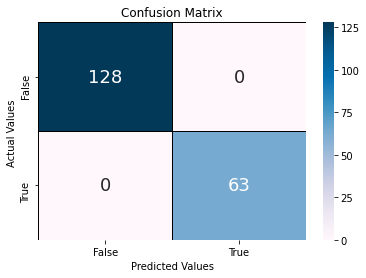

In [49]:
#Confusion Matrix
cm_NN = confusion_matrix(y_test, NN_prediction)

#Plotting the confusion matrix
ax = sns.heatmap(cm_NN, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=1, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [50]:
# 1.  Sensitivity
sensitivity_NN = TP_NN / float(TP_NN + FN_NN)
print("Sensitivity:",sensitivity_NN)

# 2.  Specificity
specificity_NN = TN_NN / float(TN_NN + FP_NN)
print("Specificity:",specificity_NN)

# 3.  Precision
precision_NN = TP_NN / float(TP_NN + FP_NN)
print("Precision:",precision_NN)

# 4.  Accuracy
accuracy_NN = (TP_NN + TN_NN) / float(TP_NN + TN_NN + FN_NN + FP_NN)
print("Accuracy:",accuracy_NN)

Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
Accuracy: 1.0


### *K-Nearest Neighbor Classifier*

In [51]:
knn = KNeighborsClassifier(n_neighbors = 5) ##n_neighbors = 5 for A3,A4,A7,A9,A10 only
scores = cross_val_score(knn, x_train, y_train, cv = 10)
#print scores.mean(), scores.std()*2
start = time.time()
knn.fit(x_train, y_train)
stop = time.time()
knn_time = f"{stop - start}"
knn_prediction = knn.predict(x_test)
knn_accuracy = knn.score(x_test, y_test)



"""print out classification accuracy, report and confusion matrix"""
print(knn_accuracy)
print(classification_report(y_test, knn_prediction))
cm_knn = confusion_matrix(y_test, knn_prediction)
print(cm_knn)
TN_knn, FP_knn, FN_knn, TP_knn = cm_knn.ravel()

0.9581151832460733
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       128
           1       0.89      1.00      0.94        63

    accuracy                           0.96       191
   macro avg       0.94      0.97      0.95       191
weighted avg       0.96      0.96      0.96       191

[[120   8]
 [  0  63]]


In [52]:
#AUC Score
auc_score_knn = roc_auc_score(y_test, knn.predict(x_test))
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
print("AUC Score:",auc_score_knn)

AUC Score: 0.96875


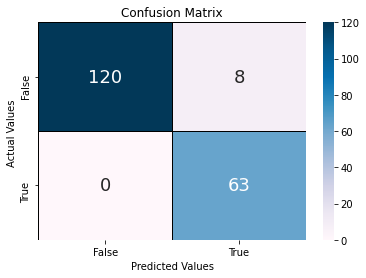

In [53]:
#Confusion Matrix
cm_knn = confusion_matrix(y_test, knn_prediction)

#Plotting the confusion matrix
ax = sns.heatmap(cm_knn, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=1, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [54]:
# 1.  Sensitivity
sensitivity_knn = TP_knn / float(TP_knn + FN_knn)
print("Sensitivity:",sensitivity_knn)

# 2.  Specificity
specificity_knn = TN_knn / float(TN_knn + FP_knn)
print("Specificity:",specificity_knn)

# 3.  Precision
precision_knn = TP_knn / float(TP_knn + FP_knn)
print("Precision:",precision_knn)

# 4.  Accuracy
accuracy_knn = (TP_knn + TN_knn) / float(TP_knn + TN_knn + FN_knn + FP_knn)
print("Accuracy:",accuracy_knn)

Sensitivity: 1.0
Specificity: 0.9375
Precision: 0.8873239436619719
Accuracy: 0.9581151832460733


### *ROC Curve*

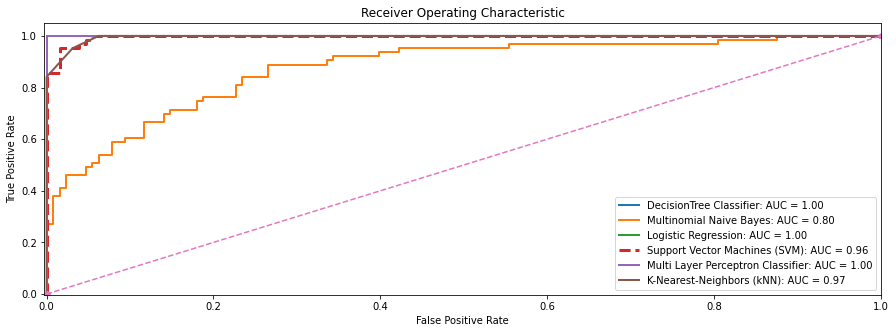

In [55]:
#Plotting the ROC Curve
plt.figure(figsize=(15,5))
plt.plot(fpr_dcTree, tpr_dcTree, label='DecisionTree Classifier: AUC = %0.2f' % auc_score_dcTree, linewidth=2)
plt.plot(fpr_NB, tpr_NB, label='Multinomial Naive Bayes: AUC = %0.2f' % auc_score_NB, linewidth=2)
plt.plot(fpr_LR, tpr_LR, label='Logistic Regression: AUC = %0.2f' % auc_score_LR, linewidth=2)
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machines (SVM): AUC = %0.2f' % auc_score_svm, linewidth=3, linestyle='dashed')
plt.plot(fpr_NN, tpr_NN, label='Multi Layer Perceptron Classifier: AUC = %0.2f' % auc_score_NN, linewidth=2)
plt.plot(fpr_knn, tpr_knn, label='K-Nearest-Neighbors (kNN): AUC = %0.2f' % auc_score_knn, linewidth=2)
plt.plot([0, 1], [0, 1],'p--')
plt.xlim([-0.003, 1.0])
plt.ylim([-0.003, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# **Evaluation Metrics**

In [56]:
#Evaluation Metrics for different models
columns = ['Model', 'Sensitivity', 'Specificity', 'Precision', 'Accuracy', 'Running Time(s)']
evaluation_met = pd.DataFrame(columns=columns)

evaluation_met['Model'] = ['DecisionTree Classifier', 'Multinomial Naive Bayes', 'Logistic Regression', 'Support Vector Machines','Multi Layer Perceptron Classifier','K-Nearest Neighbors']
evaluation_met['Sensitivity'] = [sensitivity_dcTree, sensitivity_NB, sensitivity_LR, sensitivity_svm, sensitivity_NN, sensitivity_knn]
evaluation_met['Specificity'] = [specificity_dcTree, specificity_NB, specificity_LR, specificity_svm, specificity_NN, specificity_knn]
evaluation_met['Precision'] = [precision_dcTree, precision_NB, precision_LR, precision_svm, precision_NN, precision_knn]
evaluation_met['Accuracy'] = [accuracy_dcTree, accuracy_NB, accuracy_LR, accuracy_svm, accuracy_NN, accuracy_knn]
evaluation_met['Running Time(s)'] = [dcTree_time, NB_time, LR_time, svm_time, NN_time, knn_time]

evaluation_met

,Model,Sensitivity,Specificity,Precision,Accuracy,Running Time(s)
0,DecisionTree Classifier,1.000000,1.000000,1.000000,1.000000,0.0
1,Multinomial Naive Bayes,0.888889,0.703125,0.595745,0.764398,0.008000612258911133
2,Logistic Regression,1.000000,1.000000,1.000000,1.000000,0.00836038589477539
3,Support Vector Machines,0.952381,0.968750,0.937500,0.963351,0.03124237060546875
4,Multi Layer Perceptron Classifier,1.000000,1.000000,1.000000,1.000000,0.04048800468444824
5,K-Nearest Neighbors,1.000000,0.937500,0.887324,0.958115,0.0


# **Testing**

In [57]:
def Toddler():
    s = [0]*10
    y = '''
    Does your child look at you when you call his/her name?
    How easy is it for you to get eye contact with your child?
    Does your child point to indicate that she/he wants something (e.g. a toy that is out of reach)?
    Does your child point to share interest with you (e.g. pointing at an interesting sight)?
    Does your child pretend (e.g. care for dolls, talk on a toy phone)?
    Does your child follow where you’re looking?
    If you or someone else in the family is visibly upset, does your child show signs of wanting to comfort them? (e.g. stroking hair, hugging them)?
    Would you describe your child’s first words as:?
    Does your child use simple gestures (e.g. wave goodbye)?
    Does your child stare at nothing with no apparent purpose?
    '''
    y = [i.strip() for i in y.split('\n')][1:-1]
    
    for i in range(len(y)):
        q = "Q{}. {}(Yes/No)".format(i+1,y[i])
        q_a = input(q)
        while q_a[0].upper() not in ("Y","N"):
            q_a = input("Please enter either yes or no.\n{}".format(q))
        if q_a[0].upper()=='Y': s[i]=1
    
    return s

In [58]:
def Child():
    s = [0]*10
    y = '''
    She/he often notices small sounds when others do not?
    She/he usually concentrates more on the whole picture, rather than the small details?
    In a social group, she/he can easily keep track of several different people’s conversations?
    She/he finds it easy to go back and forth between different activities?
    Does she/he know how to keep a conversation going with his/her peers?
    She/he is good at social chit-chat?
    When she/he is read a story, she/he finds it difficult to work out the characters intentions or feelings?
    When she/he was in preschool, she/he used to enjoy playing games involving pretending with other children?
    She/he finds it easy to work out what someone is thinking or feeling just by looking at their face?
    She/he finds it hard to make new friends?
    '''
    y = [i.strip() for i in y.split('\n')][1:-1]
    
    for i in range(len(y)):
        q = "Q{}. {}(Yes/No)".format(i+1,y[i])
        q_a = input(q)
        while q_a[0].upper() not in ("Y","N"):
            q_a = input("Please enter either yes or no.\n{}".format(q))
        if q_a[0].upper()=='Y': s[i]=1
    
    return s

In [59]:
def Adolescent():
    s = [0]*10
    y = '''
    She/he often notices small sounds when others do not?
    She/he usually concentrates more on the whole picture, rather than the small details?
    In a social group, she/he can easily keep track of several different people's conversations?
    She/he finds it easy to go back and forth between different activities?
    She/he doesn't know how to keep a conversation going with his/her peers?
    She/he is good at social chit-chat?
    When she/he was younger, she/he used to enjoy playing games involving pretending with other children?
    She/he finds it difficult to imagine what it would be like to be someone else?
    She/he finds social situations easy?
    She/he finds it hard to make new friends?
    '''
    y = [i.strip() for i in y.split('\n')][1:-1]
    
    for i in range(len(y)):
        q = "Q{}. {}(Yes/No)".format(i+1,y[i])
        q_a = input(q)
        while q_a[0].upper() not in ("Y","N"):
            q_a = input("Please enter either yes or no.\n{}".format(q))
        if q_a[0].upper()=='Y': s[i]=1
    
    return s

In [60]:
def Adult():
    s = [0]*10
    y = '''
    She/he notices patterns in things all the time?
    She/he usually concentrates more on the whole picture, rather than the small details?
    I find it easy to do more than one thing at once?
    If there is an interruption, she/he can switch back to what she/he was doing very quick?
    I find it easy to read between the lines when someone is talking to me?
    I know how to tell if someone listening to me is getting bored?
    When I'm reading a story, I find it difficult to work out the characters intentions?
    I like to collect information about categories of things (e.g. types of car, types of bird, types of train, types of plant etc)?
    I find it easy to work out what someone is thinking or feeling just by looking at their face?
    I find it difficult to work out people's intentions?
    '''
    y = [i.strip() for i in y.split('\n')][1:-1]
    
    for i in range(len(y)):
        q = "Q{}. {}(Yes/No)".format(i+1,y[i])
        q_a = input(q)
        while q_a[0].upper() not in ("Y","N"):
            q_a = input("Please enter either yes or no.\n{}".format(q))
        if q_a[0].upper()=='Y': s[i]=1
    
    return s

In [61]:
user_input = {}

age = int(input("Please Enter the age: ").strip())

gender = input("Please Enter your gender: (male/female)").strip()[0]

q = "{}(Yes/No)".format('Do you ever had jaundice: ')
jaundice = input(q)
while jaundice.upper()[0] not in ("Y","N"):
    jaundice = input("Please enter either yes or no.\n{}".format(q))
jaundice = jaundice.strip().lower()


q = "{}(Yes/No)".format('Does any immediate family member have autism: ')
autism = input(q)
while autism.upper()[0] not in ("Y","N"):
    autism = input("Please enter either yes or no.\n{}".format(q))
autism = autism.strip().lower()
    
if age>1 and age<=4:
    score = Toddler()
if age>4 and age<=11:
    score = Child()
elif age>11 and age<=18:
    score = Adolescent()
elif age>18:
    score = Adult()

result = sum(score)
    
user_input["age"] = [age]
user_input["gender"] = [gender]
user_input["jaundice"] = [jaundice]
user_input["autism"] = [autism]
user_input["A1"]= [score.pop(0)]
user_input["A2"]= [score.pop(0)]
user_input["A3"]= [score.pop(0)]
user_input["A4"]= [score.pop(0)]
user_input["A5"]= [score.pop(0)]
user_input["A6"]= [score.pop(0)]
user_input["A7"]= [score.pop(0)]
user_input["A8"]= [score.pop(0)]
user_input["A9"]= [score.pop(0)]
user_input["A10"]= [score.pop(0)]
user_input["result"]= [result]

user_input = pd.DataFrame.from_dict(user_input)
user_input = test_process(user_input)
user_input = user_input[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'age','gender', 'jaundice', 'autism', 'result']]


Please Enter the age: 20
Please Enter your gender: (male/female)male
Do you ever had jaundice: (Yes/No)yes
Does any immediate family member have autism: (Yes/No)no
Q1. She/he notices patterns in things all the time?(Yes/No)yes
Q2. She/he usually concentrates more on the whole picture, rather than the small details?(Yes/No)no
Q3. I find it easy to do more than one thing at once?(Yes/No)yes
Q4. If there is an interruption, she/he can switch back to what she/he was doing very quick?(Yes/No)no
Q5. I find it easy to read between the lines when someone is talking to me?(Yes/No)no
Q6. I know how to tell if someone listening to me is getting bored?(Yes/No)yes
Q7. When I'm reading a story, I find it difficult to work out the characters intentions?(Yes/No)no
Q8. I like to collect information about categories of things (e.g. types of car, types of bird, types of train, types of plant etc)?(Yes/No)no
Q9. I find it easy to work out what someone is thinking or feeling just by looking at their face?(

In [62]:
dcTree_prediction = dcTree.predict(user_input)
NB_prediction = NB.predict(user_input)
LR_prediction = LR.predict(user_input)
svm_prediction = svm.predict(user_input)
NN_prediction = NN.predict(user_input)
knn_prediction = knn.predict(user_input)

In [63]:
print("DecisionTree Classifier Algorithm predicts you have autism" if not dcTree_prediction==1 else "DecisionTree Classifier Algorithm predicts you don't have autism")
print("Multinomial Naive Bayes Algorithm predicts you have autism" if not NB_prediction==1 else "Multinomial Naive Bayes Algorithm predicts you don't have autism")
print("Logistic Regression Algorithm predicts you have autism" if not LR_prediction==1 else "Logistic Regression Algorithm predicts you don't have autism")
print("Support Vector Machine Algorithm predicts you have autism" if not svm_prediction==1 else "Support Vector Machine Algorithm predicts you don't have autism")
print("Multi Layer Perceptron Classifier Algorithm predicts you have autism" if not NN_prediction==1 else "Multi Layer Perceptron Classifier Algorithm predicts you don't have autism")
print("K-Nearest Neighbor Algorithm predicts you have autism" if not knn_prediction==1 else "K-Nearest Neighbor Algorithm predicts you don't have autism")


DecisionTree Classifier Algorithm predicts you have autism
Multinomial Naive Bayes Algorithm predicts you don't have autism
Logistic Regression Algorithm predicts you don't have autism
Support Vector Machine Algorithm predicts you don't have autism
Multi Layer Perceptron Classifier Algorithm predicts you don't have autism
K-Nearest Neighbor Algorithm predicts you don't have autism


#### **Dummy Data**

In [ ]:
user_input = {}
score = [0,1,1,0,0,1,0,1,0,0]
result = sum(score)
user_input["age"] = [6]
user_input["gender"] = ["f"]
user_input["jaundice"] = ["yes"]
user_input["autism"] = ["no"]
user_input["A1"]=[score.pop(0)] 
user_input["A2"]= [score.pop(0)]
user_input["A3"]= [score.pop(0)]
user_input["A4"]= [score.pop(0)]
user_input["A5"]= [score.pop(0)]
user_input["A6"]= [score.pop(0)]
user_input["A7"]= [score.pop(0)]
user_input["A8"]= [score.pop(0)]
user_input["A9"]= [score.pop(0)]
user_input["A10"]= [score.pop(0)]
user_input["result"]= [result]

user_input = pd.DataFrame.from_dict(user_input)
user_input = test_process(user_input)
user_input = user_input[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'age','gender', 'jaundice', 'autism', 'result']]

In [ ]:
print(user_input)